In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.optimize import minimize
from pandas import read_csv
from scipy.spatial.distance import euclidean

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_Youtube.csv to Spotify_Youtube.csv


In [3]:
df1 = pd.read_csv("Spotify_Youtube.csv")

In [73]:
df1.head()

,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,6.172597e+08


Para este analisis no nos interesan los datos de Youtube, ya que el análisis se limita a Spotify, por lo que parte de la limpieza de los datos va a consistir en eliminar estas columnas. Únicamente nos vamos a quedar con las visitas y los likes de youtube, ya que con estos datos podemos analizar la correlación de visitas y 'me gusta', datos que Spotify no proporciona y que puede resultar util. También vamos a eliminar la url de Spotify, ya que en este proyecto tampoco aporta información útil

In [74]:
df1.drop('Url_youtube', axis=1, inplace=True)
df1.drop('Title', axis=1, inplace=True)
df1.drop('Channel', axis=1, inplace=True)
df1.drop('Comments', axis=1, inplace=True)
df1.drop('Description', axis=1, inplace=True)
df1.drop('Licensed', axis=1, inplace=True)
df1.drop('official_video', axis=1, inplace=True)
df1.drop('Url_spotify', axis=1, inplace=True)
df1.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: ignored

La uri en este caso sale como un link, asi que vamos a quitar ese texto de 'spotify:track: para quedarnos unicamente con el ID, que nos va a servir para juntar esta base de datos con otra que nos aporta el género.

In [6]:
df1['Uri'] = df1['Uri'].str.replace('spotify:track:', '')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


In [8]:
df2 = pd.read_csv("SpotifyFeatures.csv")

In [9]:
df2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [75]:
 df = pd.merge(df1, df2[['track_id', 'genre', 'key']], left_on='Uri', right_on='track_id', how='left')
 df.drop('track_id', axis =1, inplace=True)
df.drop('Key', axis =1, inplace=True)

In [76]:
df.head()

,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,genre,key
0,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09,Alternative,F#
1,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09,Hip-Hop,F#
2,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09,Children’s Music,F#
3,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09,Pop,F#
4,Gorillaz,Rhinestone Eyes,Plastic Beach,album,1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,3.100837e+08,Alternative,G#


La cantidad de datos actual es de 27410:

In [12]:
cantidad_datos = len(df)
print(cantidad_datos)

27410


De estos datos, vamos a eliminar los valores nulos y posibles duplicados para reducir el margen de error.

In [13]:
df.dropna(inplace=True)
df = df.drop_duplicates(subset=['Uri'], keep='first')

Si volvemos a ejecutar la cantidad de datos ahora obtenemos 5102

In [14]:
cantidad_datos = len(df)
print(cantidad_datos)

5102


No trabajamos con datos sensibles en este caso, por lo que no será necesario Tokenizar.

Vamos a ver la descripción de los atributos del df y el tipo de cada dato para tener una visión más específica

In [15]:
df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
count,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5.102000e+03,5.102000e+03,5.102000e+03
mean,0.590458,0.640877,-7.883377,0.083838,0.249527,0.063862,0.187233,0.512537,119.891604,234830.143277,1.433373e+08,8.807428e+05,2.228393e+08
std,0.168949,0.229562,4.993763,0.088715,0.289270,0.203314,0.154003,0.245678,29.661746,63887.918821,3.529080e+08,2.044262e+06,3.056780e+08
min,0.000000,0.001440,-41.932000,0.000000,0.000003,0.000000,0.015700,0.000000,0.000000,51800.000000,2.600000e+01,0.000000e+00,8.650310e+05
25%,0.484000,0.502000,-9.244750,0.034200,0.020825,0.000000,0.093200,0.318250,96.020250,197896.500000,4.561898e+06,4.156125e+04,4.704768e+07
50%,0.601000,0.679000,-6.509500,0.046350,0.119000,0.000007,0.123500,0.517000,118.625500,227933.000000,2.909184e+07,2.003755e+05,1.122799e+08
75%,0.712000,0.824000,-4.885000,0.087600,0.398000,0.001230,0.238000,0.710000,138.088000,263073.250000,1.227472e+08,7.766420e+05,2.668073e+08
max,0.975000,0.996000,0.175000,0.944000,0.996000,0.988000,1.000000,0.985000,243.372000,975267.000000,5.908398e+09,4.014762e+07,3.362005e+09


In [16]:
df.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
genre                object
key                  object
dtype: object

Todos los datos tienen sentido, no parece que tengamos que realizar transformaciones de tipo.

Vamos a generar un mapa de calor ordenado antes que cualquier otra visualización para detectar las correlaciones más importantes

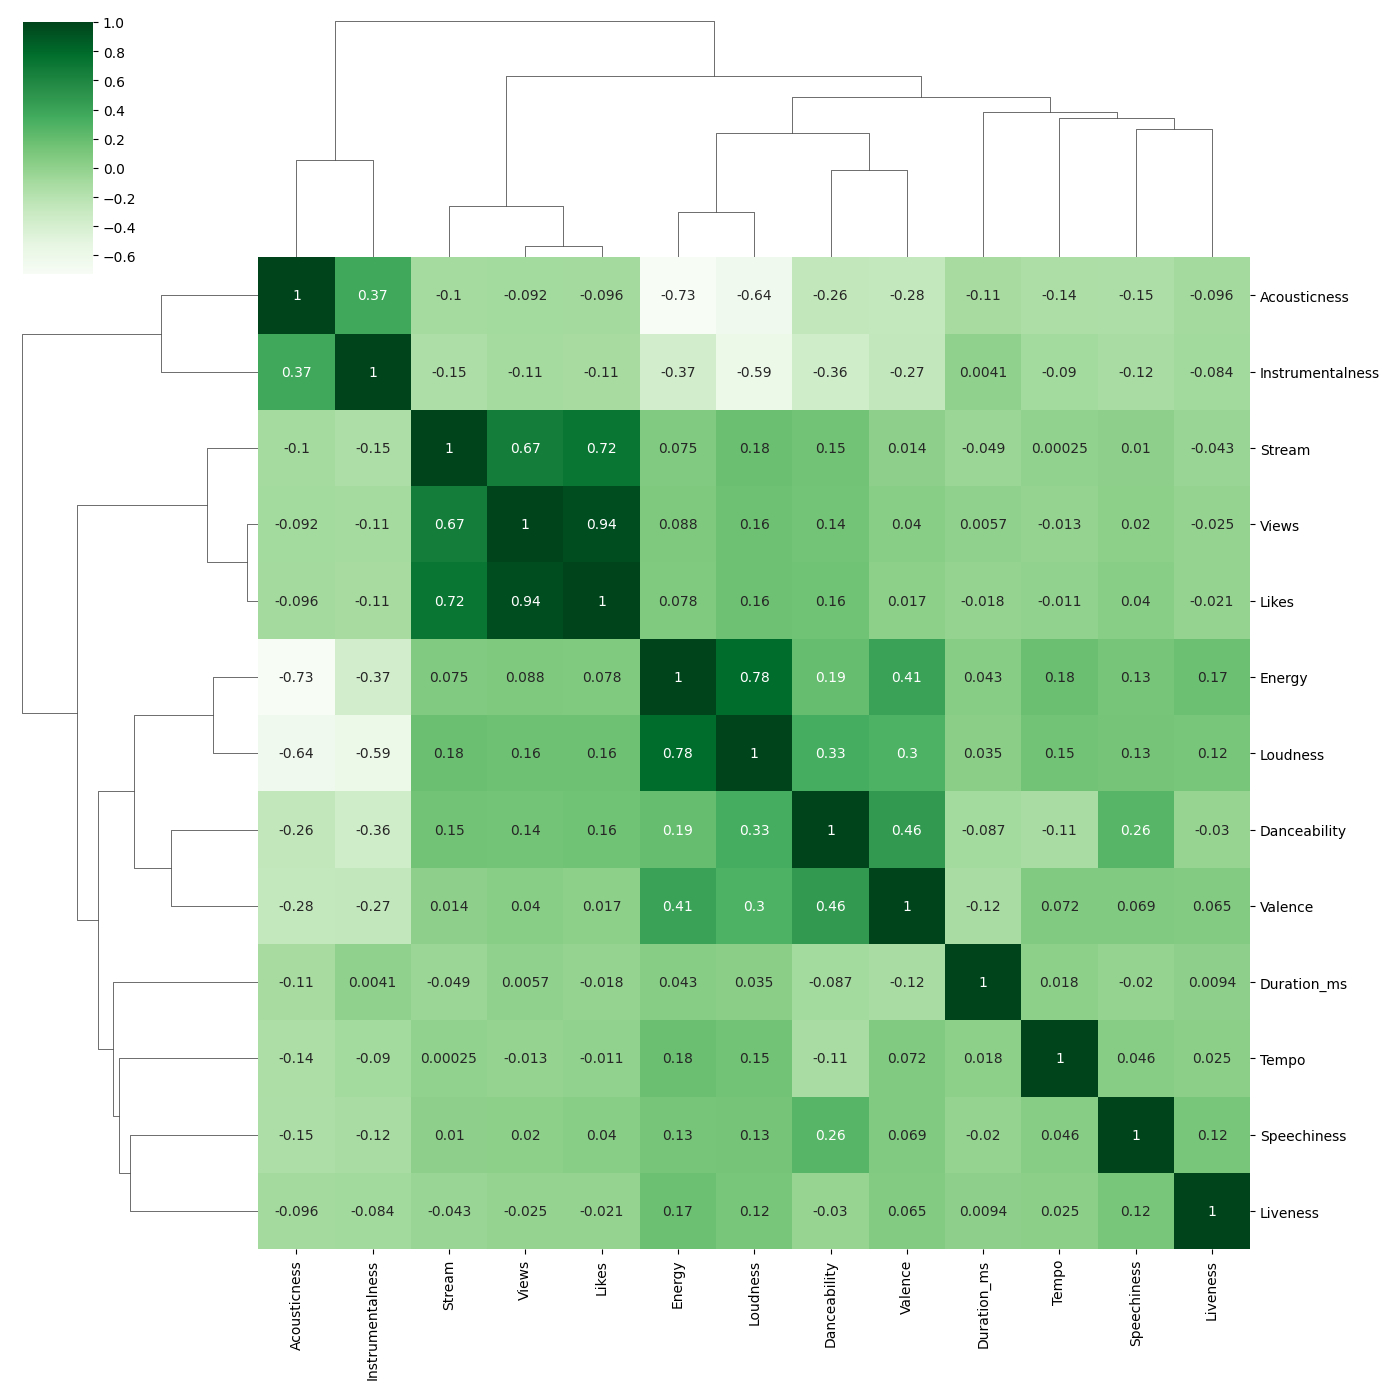

In [17]:
corr_matrix = df.corr(numeric_only=True)
sns.clustermap(corr_matrix, annot=True, cmap='Greens', figsize=(14,14))
plt.show()

Con este mapa de calor vemos relaciones con bastante sentido, como por ejemplo la energía de una canción y lo alta que está, la positividad que transmite y lo bailable que es o la cantidad de “me gustas” y sus visitas.
Al estar ordenado también podemos apreciar que los atributos más relacionados con el éxito de una canción son la energía, lo alto que suena y lo bailable que es. También vemos alguna relación negativa, como la duración de las canciones, parece que cuanto más largas son menos visitas reciben.

Lo que me parece curioso es que las visitas de Youtube y Spotify solo tienen un 0.65 de relación. Vamos a verlo más en detalle.

<Axes: xlabel='Views', ylabel='Stream'>

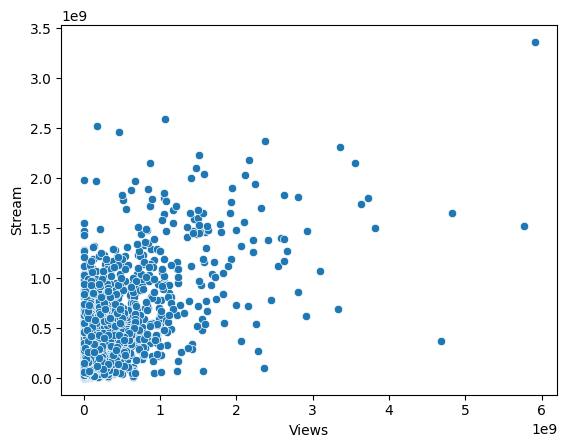

In [18]:
sns.scatterplot(data=df, x='Views', y='Stream')

No hay una relación suficiente en los datos de Youtube como para que nos aporte algo significativo, debido a que este estudio es sobre Spotify vamos a dejar de utilizar estas columnas. Si nos interesan los 'Likes', así que vamos a transformar los datos para poder utilizar estos valores.


Vamos a crear un nuevo campo llamado "Like" que sea proporcional a los Likes de Youtube pero para Spotify. Es decir, compara las visitas de Youtube con las de Spotify y según los Likes del primero, asociamos una cantidad proporcional de Likes para el segundo. De esta forma podemos analizar los datos de Spotify sin necesitar los de Youtube.

In [19]:
df['Like'] = df['Stream'] * df['Likes'] / df['Views']

Vamos a ver las canciones con más Streams

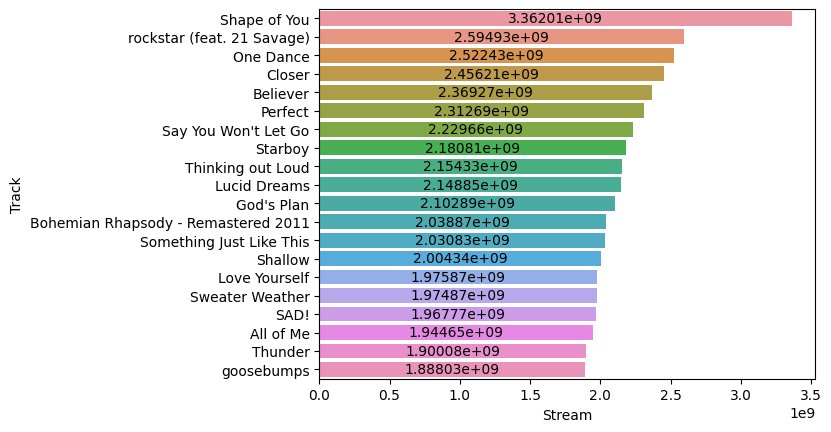

In [20]:
top_stream = df.nlargest(20,'Stream')
ax = sns.barplot(x='Stream', y='Track', data=top_stream)
for i in ax.containers:
   ax.bar_label(i,label_type='center')

Ahora vamos a ver las canciones con más Likes

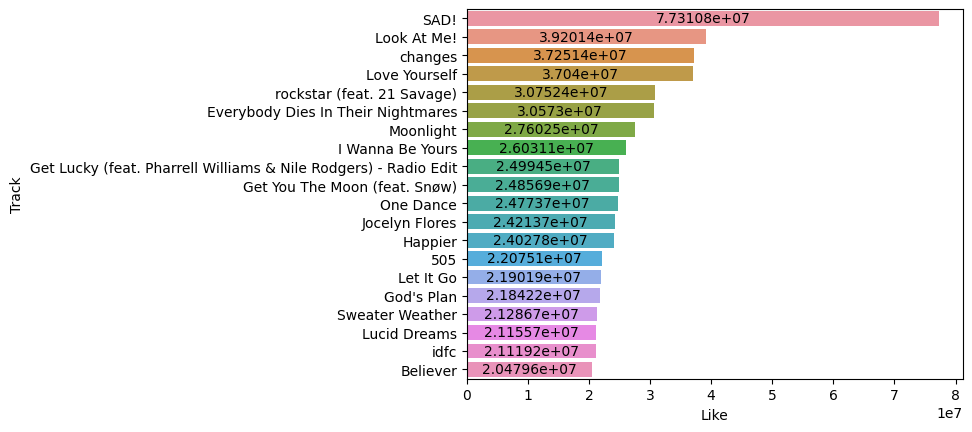

In [21]:
top_like = df.nlargest(20,'Like')
ax = sns.barplot(x='Like', y='Track', data=top_like)
for i in ax.containers:
    ax.bar_label(i,label_type='center')

Vemos que alguna coincide en el Top 10, pero no está clara la relación. Vamos a hacer un gráfico de dispersión para verlo mejor.

<Axes: xlabel='Stream', ylabel='Like'>

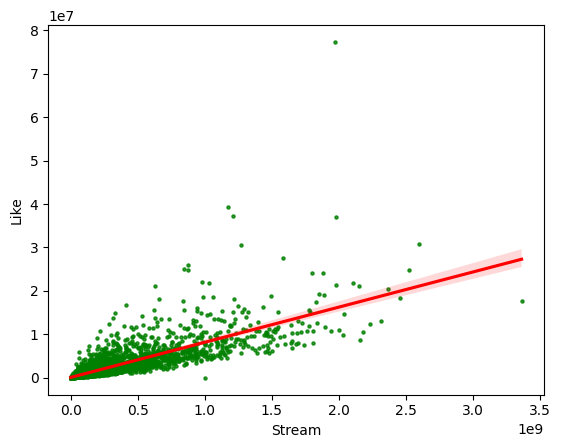

In [22]:
sns.regplot(x='Stream', y='Like', data=df, scatter_kws={"s": 5}, color="g", line_kws={"color": "r"})

Con este gráfico confirmamos una relación clara entre Streams y Likes, el Top 10 no coincide porque son casos aislados específicos que tendrán motivos ajenos (popularidad de un grupo, una polémica, un Trend en redes sociales…)

La longitud de los títulos quizás podría afectar a las visitas de una canción, ya que cuanto mas largo es un título más se tarda en escribirlo.
Vamos a comprobarlo con el coeficiente de correlación de Pearson. Si el coeficiente se acerca a 1 tendremos una correlación fuerte positiva, mientras que si se acerca a -1 la correlación serña negativa.

In [24]:
track_length = df['Track'].str.len()
corr, _ = pearsonr(track_length, df['Stream'])
print(f'Coeficiente de correlación de Pearson: {corr:.3f}')

Coeficiente de correlación de Pearson: -0.076


Como podemos ver, no hay una relación fuerte entre la longitud de las canciones y sus visitas; la poca que hay es negativa, es decir que cuanto más largo es un título menos visitas tiene, pero no suficientemente fuerte como para ser destacable. Como no es significativo, no vamos a tenerlo en cuenta para la predicción.

Vamos a anlizar qué géneros son más populares. Para ello vamos a agrupar por género y sumar el total de visitas. Ahora vamos a visualizarlo con un diagrama de barras.

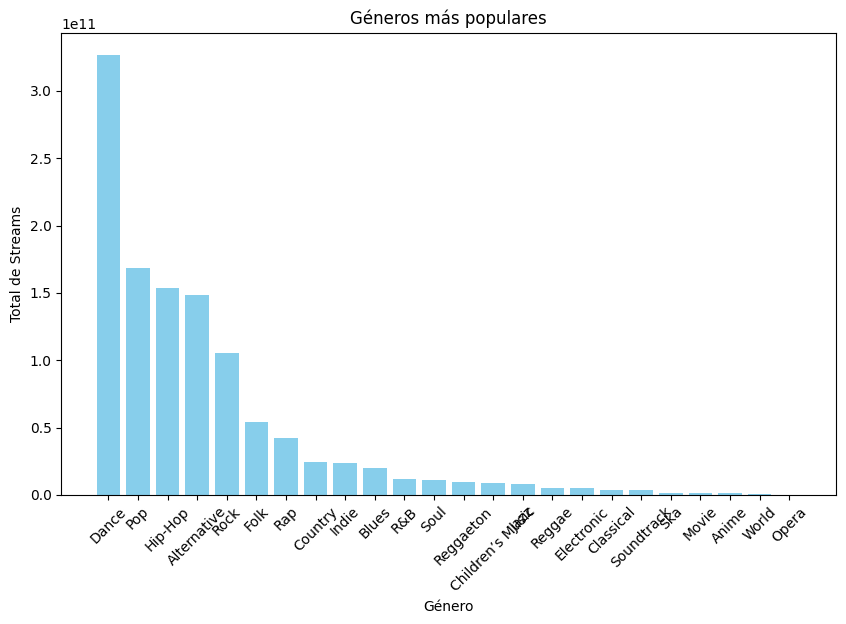

In [25]:
df_agrupado = df.groupby('genre')['Stream'].sum().reset_index()

df_agrupado = df_agrupado.sort_values(by='Stream', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(df_agrupado['genre'], df_agrupado['Stream'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Total de Streams')
plt.title('Géneros más populares')
plt.xticks(rotation=45)
plt.show()

Ahora que ya hemos visualizado los datos y tenemos una imagen clara, vamos a comparar diferentes modelos de predicción y ver cuál será mejor predecir Streams en nuevas canciones.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Separamos las variables independientes y dependientes
x = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']]
y = df['Stream']

# Dividimos el dataframe en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Diccionario para almacenar los resultados
results = {}

# Evaluamos la regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión lineal'] = mse

# Evaluamos la regresión polinómica
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)
y_pred = poly_reg.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
results['Regresión polinómica'] = mse

# Evaluamos la regresión de árbol de decisión
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión de árbol de decisión'] = mse

# Evaluamos la regresión de bosque aleatorio
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión de bosque aleatorio'] = mse

# Evaluamos la regresión con máquinas de vectores de soporte
svm_reg = SVR(kernel='linear')
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión con máquinas de vectores de soporte'] = mse

# Mostramos los resultados
for model, mse in results.items():
    print(f'{model}: {mse:.3f}')

Regresión lineal: 74224000464820800.000
Regresión polinómica: 73115193913902368.000
Regresión de árbol de decisión: 201609471780889408.000
Regresión de bosque aleatorio: 79596582274039968.000
Regresión con máquinas de vectores de soporte: 88872384647473792.000


Hemos calculado el error cuantico medio (MSE), y el que mejor se ajusta para este caso es el de regresión de bosque aleatorio.

In [27]:
# Creamos un ejemplo para una nueva canción
new_track = pd.DataFrame({
    'Danceability': [0.7],
    'Energy': [0.65],
    'Loudness': [-1.2],
    'Speechiness': [0.31],
    'Acousticness': [0.02],
    'Instrumentalness': [0.12],
    'Liveness': [-0.03],
    'Valence': [0.7],
    'Tempo': [110],
    'Duration_ms': [210000]
})

# Hacemos una predicción para la nueva "Track"
stream_pred = forest_reg.predict(new_track)

# Mostramos el resultado
print(f'Predicción de Streams para la nueva Track: {stream_pred[0]:.1f}')

Predicción de Streams para la nueva Track: 495565270.3


Ahora vamos a ver en qué posición de la lista estará esta canción si las ordenamos por visitas.

In [28]:
df_sorted = df.sort_values(by='Stream', ascending=False)
index = df_sorted[df_sorted['Stream'] < stream_pred[0]].index[0]
percentile = 100 * (index + 1) / len(df)
print(f'La nueva canción sería la {index + 1} más escuchada')
print(f'La nueva canción sería más escuchada que el {percentile:.1f} % de canciones')


La nueva canción sería la 17294 más escuchada
La nueva canción sería más escuchada que el 339.0 % de canciones


A CONTINUACION VAMOS A PASAR A LA RECOMENDACION DE MÚSICA POR USUARIO

Vamos a realizar un filtro colaborativo.

Para ello vamos a utilizar un dataset que contiene usuarios y puntuaciones que le han dado a canciones.

In [29]:
data = 'https://gist.githubusercontent.com/jackbandy/5cd988ab5c3d95b79219364dce7ee5ae/raw/18e286e7c69a28de222eb0fa17a59d280a858cba/song-ratings.csv'
song_ratings = read_csv(data, index_col=0)
song_ratings.isnull().values.any()

True

Vamos a rellenar los huecos vacíos con 0

In [30]:
song_ratings = song_ratings.fillna(0)

In [31]:
song_ratings

,One Dance (Drake),Lean On (Major Lazer),Sunflower (Post Malone and Swae Lee),Somebody That I Used To Know (Gotye),Rolling in the Deep (Adele),Can't Hold Us (Macklemore),7 Rings (Ariana Grande),Wake Me Up (Avicii),Love The Way You Lie (Eminem and Rihanna),bad guy (Billie Eilish),...,Closer (The Chainsmokers),Cheerleader (OMI),Radioactive (Imagine Dragons),Señorita (Shawn Mendes and Camila Cabello),Airplanes (B.o.B and Hayley Williams),Want (Birdtalker),Without You (David Guetta and Usher),Half Love (Red Hearse),Old Town Road - Remix (Lil Nas X and Billy Ray Cyrus),Never Really Over (Katy Perry)
Name,,,,,,,,,,,,,,,,,,,,,
Jack,5.0,4.0,0.0,2,4,4.0,0.0,5.0,2.0,4.0,...,5.0,2.0,5,2.0,2.0,5.0,5.0,4.0,5,5.0
Nick,4.0,5.0,5.0,4,5,3.0,5.0,2.0,3.0,5.0,...,1.0,2.0,2,3.0,3.0,4.0,3.0,4.0,2,5.0
Trevor,2.0,3.0,2.0,4,3,1.0,3.0,4.0,3.0,2.0,...,4.0,1.0,5,4.0,3.0,0.0,0.0,0.0,1,3.0
Billy,5.0,4.0,2.0,3,3,5.0,4.0,3.0,2.0,5.0,...,3.0,2.0,5,1.0,5.0,1.0,1.0,1.0,4,5.0
Jewel,5.0,5.0,3.0,3,5,4.0,3.0,4.0,3.0,5.0,...,4.0,2.0,3,2.0,3.0,0.0,4.0,0.0,1,5.0
Meg,5.0,4.0,4.0,3,3,3.0,3.0,5.0,4.0,5.0,...,3.0,2.0,5,3.0,3.0,3.0,4.0,0.0,2,5.0
Joe,3.0,4.0,5.0,4,5,4.0,3.0,4.0,3.0,4.0,...,2.0,4.0,3,3.0,4.0,4.0,3.0,4.0,5,3.0
Lee,0.0,0.0,0.0,3,5,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,2,4.0
Hannah,4.0,2.0,5.0,3,4,3.0,3.0,3.0,4.0,5.0,...,5.0,2.0,5,4.0,1.0,0.0,1.0,0.0,2,0.0


Lo primero que hay que hacer es realizar una función que mida la "distancia" entre 2 personas.

In [32]:
def distance(person1, person2):
  distance = euclidean(person1, person2)
  return distance

In [33]:
p1 = song_ratings.loc['Jack']
p2 = song_ratings.loc['Joe']
p3 = song_ratings.loc['Adala']
p4 = song_ratings.loc['Elizabeth']
print("Distancia entre Jack y Joe")
print(distance(p1, p2))
print("Distancia entre Jack y Adala")
print(distance(p1, p3))
print("Distancia entre Jack y Elizabeth")
print(distance(p1, p4))

Distancia entre Jack y Joe
9.219544457292887
Distancia entre Jack y Adala
13.2664991614216
Distancia entre Jack y Elizabeth
12.083045973594572


Usando un bucle podemos saber de forma automática qué usuario tiene unos gustos musicales más parecidos a otro, para no tener que ir explorando uno a uno manualmente.

In [34]:
def similar_to(name):
    person = song_ratings.loc[name]
    closest_distance = float('inf')
    closest_person = ''
    for other_person in song_ratings.itertuples():
        if other_person.Index == name:
            continue
        distance_to_other_person = distance(
            person, song_ratings.loc[other_person.Index])
        if distance_to_other_person < closest_distance:
            closest_distance = distance_to_other_person
            closest_person = other_person.Index
    return closest_person, closest_distance

Este código itera cada usuario y guarda el valor de distancia más bajo; lo va sobrescribiendo en el momento en que encuentra un valor menor (no se tiene en cuenta a sí mismo evidentemente).
Ahora podemos ver quién es realmente el usuario más parecido a Jack.

In [35]:
person_most_similar, distance = similar_to("Jack")
print("Jack tiene unos gustos musicales más parecidos a: " +
person_most_similar)
print(distance)


Jack tiene unos gustos musicales más parecidos a: Jerry
8.602325267042627


AHORA VAMOS A TRABAJAR CON NUESTRO USUARIO REAL DE SPOTIFY

Utilizando Spotify Web API, podemos hacer recomendaciones a nuestro propio usuario real. Para ello vamos a crear un usuario con la misma cuenta que utilizamos, creando una nueva aplicación con un ID de cliente y una clave para poder llamar a la API.

In [36]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 7.3 MB/s eta 0:00:00


In [37]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from skimage import io
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import spotipy.util as util

Tenemos localizado nuestro ID y Secret, que serán guardados en unos parámetros por motivos de seguridad.

In [ ]:
client_id = "09a515455c5f4965ba8a75c607fd46b8"
client_secret = "21de86bf4b094af9bf91712e7b6b3356"

Ahora ya podemos iniciar una conexión con nuestros datos

In [54]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="09a515455c5f4965ba8a75c607fd46b8", client_secret="21de86bf4b094af9bf91712e7b6b3356", redirect_uri="https://example.com/callback/", scope="user-library-read",open_browser=False))

Ahora que estamos conectados, podemos ver las playlists que tenemos disponibles en nuestra cuenta. Vamos a guardar los nombres de éstas en variables para utilizarlas posteriormente para crear un análisis de recomendación en base a las canciones que contengan.

In [55]:
playlist_names = {}

for i in sp.current_user_playlists()['items']:
   playlist_names[i['name']] = i['uri'].split(':')[2]

playlist_names

{'Taylor pa la parienta': '0BSfWcP02jPUUZuyTskh4z',
 'Taylor para Luisa': '1upJgJu3yBvFVP6VFdNg71',
 'Yungblud para Carlota ': '1fwm42W5iVn7Uc5PsZHKro',
 'Gimnasio mega gay motivation ': '1ENa3jhYJDP8KBhOJCWaz9',
 'RuPaul LypSync Songs': '6w1AlBcSUsHpMFxR4HYX6H',
 'MPB': '5xVTkR7rSd6PVGgLm0cTPN',
 'The Best of Musicals': '4fV2KpUVwtGy4YO9pM2GR6',
 'This Is One Direction': '37i9dQZF1DX6p4TJxzMRDe',
 'This Is Avenged Sevenfold': '37i9dQZF1DZ06evO09Ahq0',
 'Disney Classical': '37i9dQZF1DWVJd52AtCSiR',
 'Fuck u get over it': '1ZQDo01aI8zKhdlZVdP8JP',
 'Temazos 2000': '4Nb5G8PDHFl5FKmRjz27kk',
 'Chillout 2023': '7ozIozDp260fjNOZy1yzRG',
 '': '76Hxoh9ceKX8rPsmZVITyU',
 'Guilty Pleasures': '37i9dQZF1DX4pUKG1kS0Ac',
 'VideoGames Top Soundtracks': '5xLFYIOKSHXTRGme5S3wWa',
 'Hits From The Musicals': '37i9dQZF1DX3SzuIjjsy97',
 'Songs I hear in my head when I see you ❤': '5woUSs6UdCZXYglSypFe5L',
 'Corona concierto': '08MmBbwlio9jQcBXpim8bY',
 'Danny Elfman - The Nightmare Before Christmas': '793

Aqui volveremos a hacer uso del dataset de Spotify que utilizamos al principio

In [56]:
df.head()

,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,genre,key,Like
0,Gorillaz,Feel Good Inc.,Demon Days,album,0d28khcov6AiegSCpG5TuT,0.818,0.705,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,1.040235e+09,Alternative,F#,9.330465e+06
4,Gorillaz,Rhinestone Eyes,Plastic Beach,album,1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,3.100837e+08,Alternative,G#,4.646749e+06
9,Gorillaz,On Melancholy Hill,Plastic Beach,album,0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,4.346636e+08,Alternative,D,3.671363e+06
14,Gorillaz,Clint Eastwood,Gorillaz,album,7yMiX7n9SBvadzox8T5jzT,0.663,0.694,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,6.172597e+08,Alternative,A#,6.185081e+06
19,Gorillaz,DARE,Demon Days,album,4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,-5.852,0.0372,0.022900,...,0.2980,0.966,120.264,245000.0,259021161.0,1844658.0,3.238503e+08,Alternative,B,2.306349e+06


Como este archivo contiene características con valores discretos, debemos aplicar una codificación one-hot para representar los datos de forma vectorial. Para no sobre complicarlo, solo utilizaré las columna de tono.

In [57]:
features = df

genres = pd.get_dummies(features.genre)
keyscale = pd.get_dummies(features.key)
features = features.join(genres)
features = features.join(keyscale)


Debido a que las columnas métricas tienen rangos muy distintos, los normalizaremos estandarizando la escala.

In [58]:

scaled_features = MinMaxScaler().fit_transform([
    features['Acousticness'].values,
    features['Danceability'].values,
    features['Duration_ms'].values,
    features['Energy'].values,
    features['Instrumentalness'].values,
    features['Liveness'].values,
    features['Loudness'].values,
    features['Speechiness'].values,
    features['Tempo'].values,
    features['Valence'].values
])
features[['Acousticness', 'Danceability', 'Duration_ms', 'Energy',
          'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness',
          'Tempo', 'Valence']] = scaled_features.T

In [59]:
features = features.drop(['genre', 'Artist', 'Track', 'key', 'Album', 'Album_type'], axis=1)

Para poder analizar cualquier playlist personal, debemos convertirla a dataframe para crear una tabla con las canciones y sus características.

In [64]:
def generate_playlist_df(playlist_name, playlist_names, spotify_data):

    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_names[playlist_name]) ['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'Uri'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])

    playlist = playlist[playlist['Uri'].isin(spotify_data['Uri'].values)].sort_values('date_added',ascending = False)

    return playlist


Ahora seleccionamos una playlist para crear el dataframe. Vamos a usar la playlist "Songs to Sing in the Car"

In [67]:
df_playlist = generate_playlist_df('Songs to Sing in the Car', playlist_names, df)
df_playlist.head()

,artist,track_name,Uri,url,date_added
1,Kelly Clarkson,Since U Been Gone,3xrn9i8zhNZsTtcoWgQEAd,https://i.scdn.co/image/ab67616d00001e0203dadd...,2023-07-11 18:42:10+00:00
72,Kings of Leon,Use Somebody,5VGlqQANWDKJFl0MBG3sg2,https://i.scdn.co/image/ab67616d00001e022519d0...,2023-07-11 18:42:10+00:00
62,Beyoncé,Crazy In Love (feat. Jay-Z),5IVuqXILoxVWvWEPm82Jxr,https://i.scdn.co/image/ab67616d00001e0245680a...,2023-07-11 18:42:10+00:00
63,Owl City,Fireflies,3DamFFqW32WihKkTVlwTYQ,https://i.scdn.co/image/ab67616d00001e02785d4e...,2023-07-11 18:42:10+00:00
65,Jason Mraz,I'm Yours,1EzrEOXmMH3G43AXT1y7pA,https://i.scdn.co/image/ab67616d00001e02125b1a...,2023-07-11 18:42:10+00:00


Para hacer la similitud de cosenos entre las canciones debemos transformar la lista a vector numérico.

In [68]:
def generate_playlist_vector(spotify_features, df_playlist, weight_factor):
    spotify_features_playlist = spotify_features[spotify_features['Uri'].isin(df_playlist['Uri'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(df_playlist[['Uri', 'date_added']], on='Uri', how='inner')

    spotify_features_nonplaylist = spotify_features[~spotify_features['Uri'].isin(df_playlist['Uri'].values)]

    playlist_feature_set = spotify_features_playlist.sort_values('date_added', ascending=False)
    most_recent_date = playlist_feature_set.iloc[0, -1]

    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix, 'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)

    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))

    playlist_feature_set_weighted = playlist_feature_set.copy()
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:, :-3].mul(playlist_feature_set_weighted.weight.astype(int), 0))

    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]

    return playlist_feature_set_weighted_final.sum(axis=0), spotify_features_nonplaylist

Ahora tenemos por un lado toda una playlist convertida en vector, y por otro las canciones que no forman parte de la playlist que se encuentran en el dataset en un DataFrame.

In [69]:
playlist_vector, nondf_playlist = generate_playlist_vector(features, df_playlist, 1.2)

Finalmente, ahora sí podemos aplicar la similitud de cosenos para determinar qué canciones son
similares y producir recomendaciones. Se realizará está comparación entre el vector generado en
el paso anterior y el DataFrame de las canciones restantes. Se ordenará el resultado según las
mejores coincidencias para dar como salida los mejores 15 matches

In [70]:
def generate_recommendation(spotify_data, playlist_vector, nondf_playlist):
    non_playlist = spotify_data[spotify_data['Uri'].isin(nondf_playlist['Uri'].values)]
    non_playlist.loc[:, 'sim'] = cosine_similarity(
        nondf_playlist.drop(['Uri'], axis=1).values,
        playlist_vector.drop(labels='Uri').values.reshape(1, -1)
    )[:, 0]
    non_playlist_top5 = non_playlist.sort_values('sim', ascending=False).head(5)
    non_playlist_top5['url'] = non_playlist_top5['Uri'].apply(
        lambda x: sp.track(x)['album']['images'][1]['url']
    )
    return non_playlist_top5


In [71]:
top5 = generate_recommendation(df, playlist_vector, nondf_playlist)
top5.head()

<ipython-input-70-36d6c46088cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist.loc[:, 'sim'] = cosine_similarity(


,Artist,Track,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Views,Likes,Stream,genre,key,Like,sim,url
5259,Cypress Hill,Insane in the Brain,Black Sunday,album,1oTHteQbmJw15rPxPVXUTv,0.897,0.611,-10.489,0.2110,0.02910,...,102.304,208267.0,185008524.0,1277108.0,312441345.0,Hip-Hop,B,2.156773e+06,1.000000,https://i.scdn.co/image/ab67616d00001e02c8d744...
19404,Brantley Gilbert,You Don't Know Her Like I Do,Halfway To Heaven (Deluxe Edition),album,4WnY4W5KrqglCdIus8X9Bo,0.490,0.716,-6.681,0.0441,0.02200,...,74.988,286520.0,34759417.0,196117.0,58672246.0,Country,E,3.310362e+05,0.999999,https://i.scdn.co/image/ab67616d00001e02896200...
21524,MNEK,Never Forget You,So Good,album,6hmhG1b4LEyNuashVvuIAo,0.583,0.732,-5.728,0.0457,0.00312,...,145.992,213428.0,519338846.0,3755899.0,877421698.0,Dance,B,6.345582e+06,0.999999,https://i.scdn.co/image/ab67616d00001e029e1683...
11493,T.I.,Whatever You Like,Paper Trail,album,1IAzD1muglOxOcPbUHs70R,0.680,0.687,-6.162,0.0709,0.01610,...,150.053,249533.0,240022805.0,1198929.0,403614767.0,Dance,A,2.016081e+06,0.999998,https://i.scdn.co/image/ab67616d00001e02b6d447...
13558,Natalia Lafourcade,En el 2000,Natalia Lafourcade,album,2cVJwPD5CaTx2kBZyomzGN,0.546,0.678,-7.733,0.0819,0.47400,...,95.027,215000.0,46991132.0,254996.0,79552716.0,Alternative,G,4.316905e+05,0.999998,https://i.scdn.co/image/ab67616d00001e02084d16...
